In [ ]:
 !wget "www.cs.umn.edu/~sjguy/data/WhiteWine.txt"

URL transformed to HTTPS due to an HSTS policy
--2023-10-27 23:24:30--  https://www.cs.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www.cs.umn.edu (www.cs.umn.edu)... 104.18.20.107, 104.18.21.107, 2606:4700::6812:156b, ...
Connecting to www.cs.umn.edu (www.cs.umn.edu)|104.18.20.107|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www-users.cs.umn.edu/~sjguy/data/WhiteWine.txt [following]
--2023-10-27 23:24:31--  http://www-users.cs.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www-users.cs.umn.edu (www-users.cs.umn.edu)... 134.84.66.195
Connecting to www-users.cs.umn.edu (www-users.cs.umn.edu)|134.84.66.195|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt [following]
--2023-10-27 23:24:32--  https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www-users.cse.umn.edu (www-users.cse.umn.edu)... 134.84.66.195
Connecting to www-users.cse

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("WhiteWine.txt")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
print("start of problem 1")

start of problem 1


<Axes: xlabel='quality', ylabel='count'>

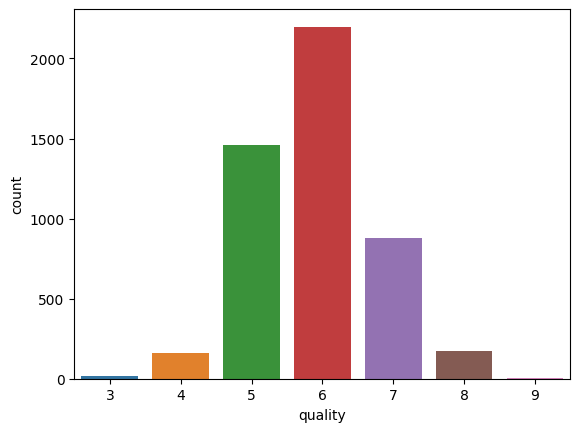

In [ ]:
sns.countplot(x=df["quality"])

<Axes: xlabel='alcohol', ylabel='Count'>

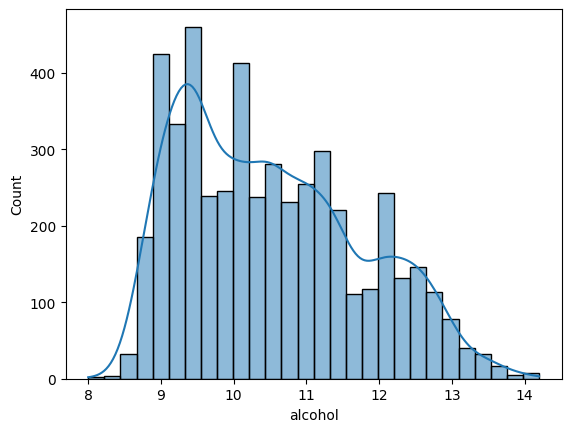

In [ ]:
sns.histplot(df['alcohol'], kde = True)

<Axes: xlabel='density', ylabel='Count'>

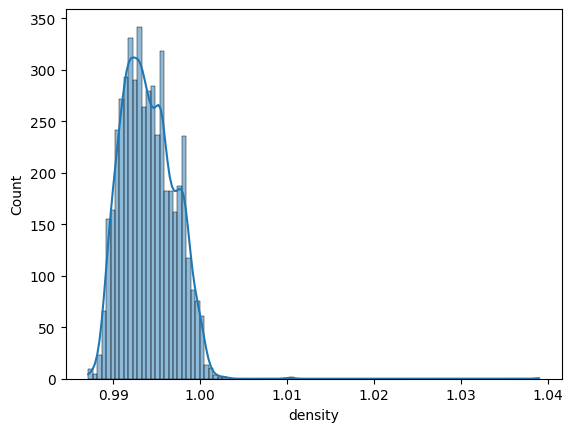

In [ ]:
sns.histplot(df['density'], kde = True)

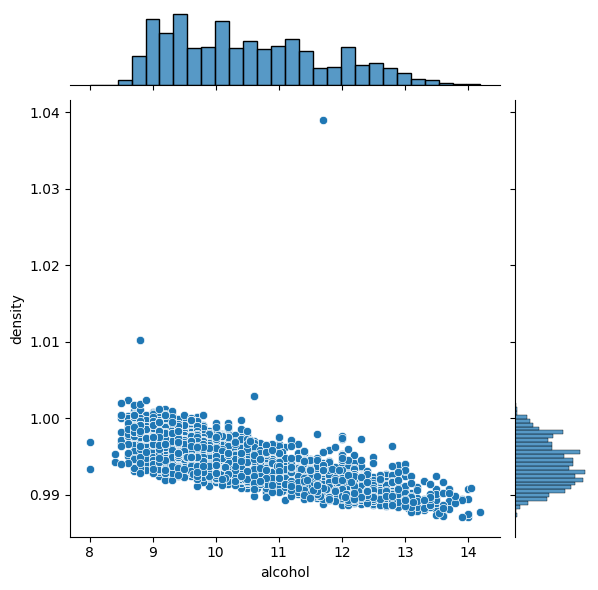

In [ ]:
sns.jointplot(x = df['alcohol'], y = df['density'])

<Axes: >

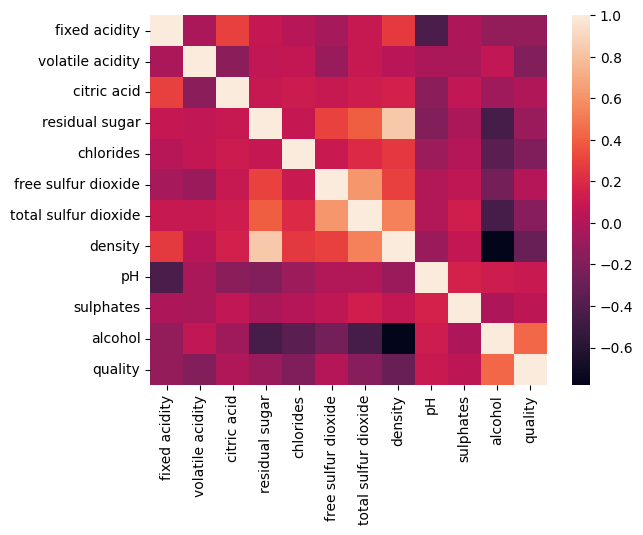

In [ ]:
sns.heatmap(df.corr())

In [ ]:
print("start of problem 2")

start of problem 2


In [ ]:
print("2A: Linear Model")

2A: Linear Model


In [ ]:
def linearModel(params, inputs):
  y_pred = params[0]*inputs + params[1]
  return y_pred

In [ ]:
def gradDec(model, n_params, x, y, lr=0.001, n_epochs=2000, print_rate=200):

  params = .1*torch.rand(n_params).float() #Random inital paramaters
  params.requires_grad = True
  #print(x)
  for epoch in range(n_epochs):
    y_pred = model(params, x)
    loss_tenor = (y_pred - y)**2
    loss = loss_tenor.mean()
    loss.backward()
    with torch.no_grad():
      params -= lr*params.grad
      params.grad.zero_()
    if epoch%print_rate==0:
      print("epoch:",epoch,"loss=",loss.item())

  return params

In [ ]:
x_pt = torch.tensor(df['alcohol'].values)/15
y_pt = torch.tensor(df['quality'].values)/10
x_pt_unorm = torch.tensor(df['alcohol'].values)
y_pt_unorm = torch.tensor(df['quality'].values)
params = gradDec(linearModel,2,x_pt,y_pt)

epoch: 0 loss= 0.32737555394509604
epoch: 200 loss= 0.10354194609495505
epoch: 400 loss= 0.03589659330779727
epoch: 600 loss= 0.01545285157410711
epoch: 800 loss= 0.009273950674030092
epoch: 1000 loss= 0.007406013302945222
epoch: 1200 loss= 0.006840889228032328
epoch: 1400 loss= 0.0066694953001929895
epoch: 1600 loss= 0.006617093784692594
epoch: 1800 loss= 0.006600651689550437


In [ ]:
norm_l = []
unorm_l = []
tot_dist = 0
for i in range(len(x_pt)):
  y_pred = params[0].item() * x_pt[i].item() + params[1].item()
  y_pred_unorm = params[0].item() * x_pt_unorm[i].item() + params[1].item()
  norm_l.append(y_pred)
  unorm_l.append(y_pred_unorm)
  tot_dist += abs(y_pred - y_pt[i].item())
pred_dist = tot_dist/len(x_pt)
print(tot_dist)
print(len(x_pt))
print(pred_dist)

308.88869205488066
4898
0.06306424909246236


<Axes: xlabel='quality'>

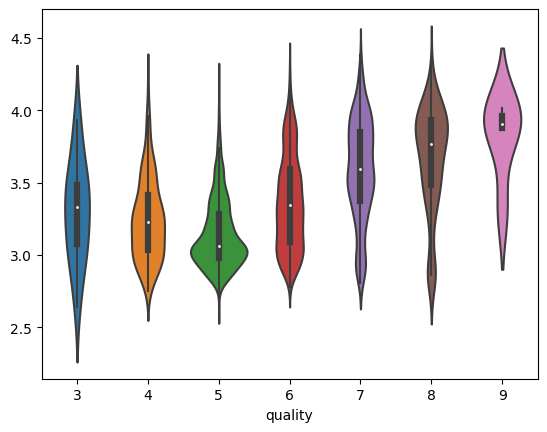

In [ ]:
k = np.array(y_pt_unorm)
sns.violinplot(x = df['quality'], y = unorm_l)

In [ ]:
print("2B: multi-linear model")

2B: multi-linear model


In [ ]:
features=["alcohol","citric acid","pH"]
x = torch.Tensor(df[features].values)
y = torch.Tensor(df["quality"].values)

In [ ]:
x_mean = x.mean(dim=0)
x_norm = (x-x_mean)/x_mean
y_mean = y.mean(dim=0)
y_norm = (y-y_mean)/y_mean

In [ ]:
def multiLinearModel(params, inputs):
  if isinstance(inputs[0], tuple):
    y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[3]
  else:
    y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[3]
  return y_pred
print(x_norm)
print(x_mean)
print(y_norm)
print(y_mean)
print(params)

tensor([[-0.1630,  0.0772, -0.0590],
        [-0.0965,  0.0174,  0.0350],
        [-0.0394,  0.1969,  0.0225],
        ...,
        [-0.1060, -0.4315, -0.0622],
        [ 0.2174, -0.1023,  0.0476],
        [ 0.1223,  0.1371,  0.0225]])
tensor([10.5143,  0.3342,  3.1883])
tensor([0.0208, 0.0208, 0.0208,  ..., 0.0208, 0.1909, 0.0208])
tensor(5.8779)
tensor([0.2813, 0.3898], requires_grad=True)


In [ ]:
params = gradDec(multiLinearModel,4,x_norm,y_norm,0.001, 0)
print(params)

tensor([0.0271, 0.0877, 0.0773, 0.0169], requires_grad=True)


In [ ]:
norm_m = []
unorm_m = []
tot_dist = 0
for i in range(len(x_norm)):
  y_pred_unorm = params[0].item() * x_pt_unorm[i].item() + params[1].item()
  y_pred = params[0] * x_norm[i][0] + params[1] * x_norm[i][1] + params[2] * x_norm[i][2] + params[3]
  norm_m.append(y_pred)
  unorm_m.append(y_pred_unorm)
  tot_dist += abs(y_pred - y_norm[i])
pred_dist = tot_dist/len(x_norm)
print(pred_dist)

tensor(0.1159, grad_fn=<DivBackward0>)


<Axes: xlabel='quality'>

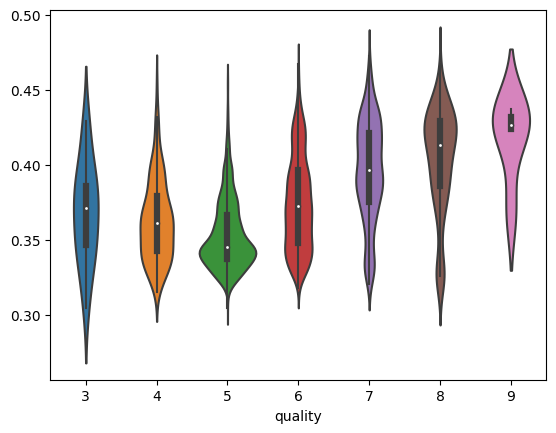

In [ ]:
sns.violinplot(x =df["quality"], y = unorm_m)

In [ ]:
print("2C: non-linear")

2C: non-linear


In [ ]:
features=["alcohol","density"]
x2 = torch.Tensor(df[features].values)
y2 = torch.Tensor(df["quality"].values)

In [ ]:
x_mean2 = x2.mean(dim=0)
x_norm2 = (x2-x_mean2)/x_mean2
y_mean2 = y2.mean(dim=0)
y_norm2 = (y-y_mean2)/y_mean2

In [ ]:
def multiLinearModel_withInteraction(params, inputs):
  y_pred = params[0]*inputs[:,0] - params[1]*inputs[:,1]  + params[3]
  return y_pred

In [ ]:
params = gradDec(multiLinearModel_withInteraction,4,x_norm2,y_norm2,0.005,2000)

epoch: 0 loss= 0.02952858805656433
epoch: 200 loss= 0.02207924611866474
epoch: 400 loss= 0.021759653463959694
epoch: 600 loss= 0.021577956154942513
epoch: 800 loss= 0.021408118307590485
epoch: 1000 loss= 0.0212473776191473
epoch: 1200 loss= 0.021095210686326027
epoch: 1400 loss= 0.0209511611610651
epoch: 1600 loss= 0.020814795047044754
epoch: 1800 loss= 0.020685700699687004


In [ ]:
norm_i = []
unorm_i = []
tot_dist = 0
for i in range(len(x_norm)):
  y_pred_unorm = params[0].item() * x_pt_unorm[i].item() + params[1].item()
  y_pred = params[0].item() * x_norm[i][0].item() - params[1].item() * x_norm[i][1].item()  + params[3].item()
  norm_i.append(y_pred)
  unorm_i.append(y_pred_unorm)
  tot_dist += abs(y_pred - y_norm[i])
pred_dist = tot_dist/len(x_norm)
print(pred_dist)

tensor(0.1120)


<Axes: xlabel='quality'>

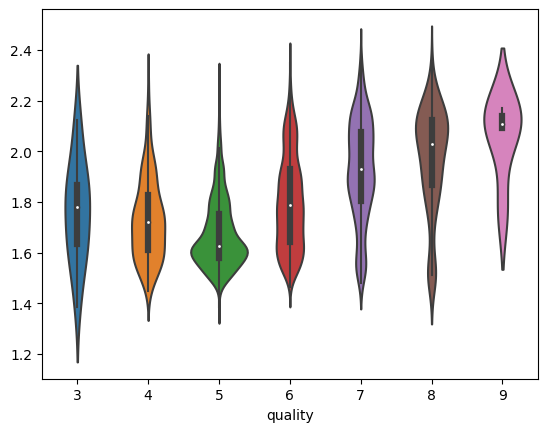

In [ ]:
sns.violinplot(x =df["quality"], y = unorm_i)

In [ ]:
print("Start of problem 3")

Start of problem 3


In [ ]:
def threshhold_acc(model, preds, actual, t, p):
  num_corr = 0
  if model == 'linear model':
    for i in range(len(actual)):
      if abs(preds[i] - actual[i].item()) <= t:
        num_corr+=1
  else:
    for i in range(len(actual)):
      if p != 1:
        item = preds[0][0]
        print(item)
        if abs(item - actual[i].item()) <= t:
          num_corr+=1
      if abs(preds[i] - actual[i]) <= t:
        num_corr+=1
  accuracy = num_corr/len(actual)
  if p == 1:
    print("Threshold at T=", t,"for the", model, "is:", accuracy)
  return accuracy

In [ ]:
threshhold_acc('linear model', norm_l, y_pt, 0.25, 1)
threshhold_acc('linear model', norm_l, y_pt, 0.5, 1)
threshhold_acc('linear model', norm_l, y_pt, 1, 1)
threshhold_acc('multi-linear model', norm_m, y_norm, 0.25, 1)
threshhold_acc('multi-linear model', norm_m, y_norm, 0.5, 1)
threshhold_acc('multi-linear model', norm_m, y_norm, 1, 1)
threshhold_acc('non-linear model', norm_i, y_norm, 0.25, 1)
threshhold_acc('non-linear model', norm_i, y_norm, 0.5, 1)
threshhold_acc('non-linear model', norm_i, y_norm, 1, 1)

Threshold at T= 0.25 for the linear model is: 0.9951000408329931
Threshold at T= 0.5 for the linear model is: 1.0
Threshold at T= 1 for the linear model is: 1.0
Threshold at T= 0.25 for the multi-linear model is: 0.9177215189873418
Threshold at T= 0.5 for the multi-linear model is: 0.9967333605553287
Threshold at T= 1 for the multi-linear model is: 1.0
Threshold at T= 0.25 for the non-linear model is: 0.9236423029808085
Threshold at T= 0.5 for the non-linear model is: 0.9981625153123724
Threshold at T= 1 for the non-linear model is: 1.0


1.0

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
def k_split(x, y, k):
  xfold = [[]] * k
  yfold = [[]] * k
  for i in range(0, len(x), k):
    xfold[i%k].append(x[i])
    yfold[i%k].append(y[i])
  return (xfold, yfold)

In [ ]:
def kfold_cross(x, y, k, model):
  acc_scores_25 = []
  acc_scores_5 = []
  acc_scores_1 = []
  y_preditions = []
  p = 0
  xfold, yfold = k_split(x, y, k)
  """print(xfold)
  print(yfold)"""
  for i in range(len(xfold)):
        cur_preds = []
        yfoldy = yfold
        yfoldy[i] = torch.Tensor(yfold[i])
        if model == 'linear':
          p = 1
          xfold[i] = torch.Tensor(xfold[i])
          params = gradDec(linearModel,2,xfold[i],yfoldy[i])
          for j in range(len(xfold[i])):
            y_pred_cur = params[0].item() * xfold[i][j].item() + params[1].item()
            cur_preds.append(y_pred_cur)

        elif model == 'multi-linear':
          p=0
          res_x = torch.stack(xfold[i])
          params = gradDec(multiLinearModel,4,res_x,yfoldy[i],0.001)
          for j in range(len(xfold[i])):
            y_pred_cur = params[0] * xfold[i][0] + params[1] * xfold[i][1] + params[2] * xfold[i][2] + params[3]
            cur_preds.append(y_pred_cur)
        else:
          p=0
          params = gradDec(multiLinearModel_withInteraction,4,xfold[i],yfoldy[i],0.005,2000)
          for j in range(len(xfold[i])):
            y_pred_cur = params[0].item() * xfold[i][0].item() - params[1].item() * xfold[i][1].item()  + params[3].item()
            cur_preds.append(y_pred_cur)
        num = 0
        while num < 3:
          if num == 0:
            acc_scores_25.append(threshhold_acc('other', cur_preds, yfold[i], 0.25, p))
          elif num == 1:
            acc_scores_5.append(threshhold_acc('other', cur_preds, yfold[i], 0.5, p))
          else:
            acc_scores_1.append(threshhold_acc('other', cur_preds, yfold[i], 1, p))
          num +=1
  average_accuracy25 = sum(acc_scores_25) / k
  average_accuracy5 = sum(acc_scores_5) / k
  average_accuracy1 = sum(acc_scores_1) / k

  return average_accuracy25, average_accuracy5, average_accuracy1

In [ ]:
actuals = [x_pt, x_norm, x_norm2]
models = ['linear', 'multi-linear', 'non-linear']
accuracies_l = []
accuracies_m = []
accuracies_i = []
for i in range(3):
  ac25, ac5, ac1 = kfold_cross(actuals[i], y_norm, 5, models[i])
  if i == 0:
    accuracies_l = [ac25, ac5, ac1]
    print("accuracy for", models[i], "with T=0.25:", accuracies_l[1])
    print("accuracy for", models[i], "with T=0.5:", accuracies_l[1])
    print("accuracy for", models[i], "with T=1.0:", accuracies_l[1])
  elif i == 1:
    accuracies_m = [ac25, ac5, ac1]
  else:
    accuracies_i = [ac25, ac5, ac1]

epoch: 0 loss= 0.02563655935227871
epoch: 200 loss= 0.023918798193335533
epoch: 400 loss= 0.02338695526123047
epoch: 600 loss= 0.023214615881443024
epoch: 800 loss= 0.02315128780901432
epoch: 1000 loss= 0.023121049627661705
epoch: 1200 loss= 0.023100877180695534
epoch: 1400 loss= 0.023083798587322235
epoch: 1600 loss= 0.023067694157361984
epoch: 1800 loss= 0.023051926866173744
Threshold at T= 0.25 for the other is: 0.9255102040816326
Threshold at T= 0.5 for the other is: 0.9979591836734694
Threshold at T= 1 for the other is: 1.0
epoch: 0 loss= 0.027553057298064232
epoch: 200 loss= 0.024336181581020355
epoch: 400 loss= 0.02335054613649845
epoch: 600 loss= 0.023041263222694397
epoch: 800 loss= 0.022937027737498283
epoch: 1000 loss= 0.02289498597383499
epoch: 1200 loss= 0.0228718388825655
epoch: 1400 loss= 0.022854449227452278
epoch: 1600 loss= 0.02283884957432747
epoch: 1800 loss= 0.022823823615908623
Threshold at T= 0.25 for the other is: 0.9255102040816326
Threshold at T= 0.5 for the o

RuntimeError: ignored